<a href="https://colab.research.google.com/github/adnansherwani/Deep-Learning/blob/main/01__PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Resources:
* PyTorch Document
* mrdburke github :  https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* https://www.learnpytorch.io/01_pytorch_workflow/


In [11]:
import torch
from torch import nn # nn contains all of PyTorch's Building blocks for the neural networks [link: https://pytorch.org/docs/stable/nn.html#module-torch.nn]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder, StandardScaler

#PyTorch Version
torch.__version__

'2.4.1+cu121'

In [12]:
PyTorch_Workflow = {1 : 'Data (Prepare & Load)',
                         2 : 'Build Model',
                         3 : 'Training/Fitting the model',
                         4 : 'Prediction/Evaluating a model (Interference)',
                         5 : 'Saving & Loading a model',
                         6 : 'Putting it all together'
                         }

PyTorch_Workflow

{1: 'Data (Prepare & Load)',
 2: 'Build Model',
 3: 'Training/Fitting the model',
 4: 'Prediction/Evaluating a model (Interference)',
 5: 'Saving & Loading a model',
 6: 'Putting it all together'}

## 1. Data (Prepare & Load)

Data can be anything:

* Excel (Formatted data)
* Images
* Audio
* Video
* DNA
* Text / PDF

Machine Learning / Deep Learning consist of two parts:
1. Get Data into numerical representations.
2. Build models to learn patterns in that numerical representations

Simple Linear Regression Formula :  `Y = mX + b`

where `Y` is the response (dependent) variable,
`X` is the predictor (independent) variable,
`m` is the estimated slope, and
`b` is the estimated intercept

In [13]:
# Create known parameters
weights = 0.7
bias = 0.3

#Create Data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias # weights = m(slope), X = X (Independent Variable), bias = b (Y-intercept), Y = Response / Dependent Variable

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
len(X), len(y)

(50, 50)

In [15]:
# Splitting training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([35, 1]),
 torch.Size([15, 1]),
 torch.Size([35, 1]),
 torch.Size([15, 1]))

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(35, 15, 35, 15)

In [18]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

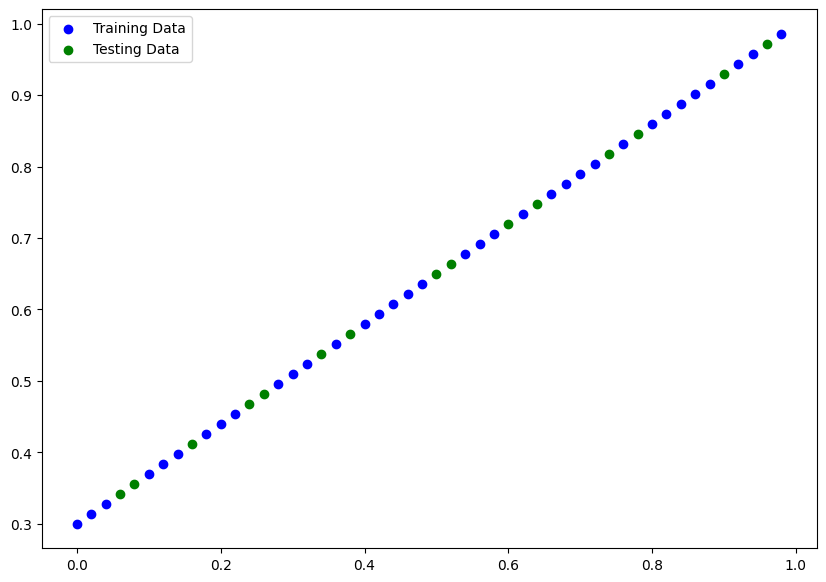

In [19]:
plot_predictions()

## 2. Build Model

PyTorch Model:
1. Simple Linear Regression

i. What does the model do?
  * Starts with random values (weight & bias)
  * Look at the training data and adjust the random values to better represent (or get closer to ) the ideal values (the orifinal weight = 0.7 and bias = 0.3 which we uised to create the data)

ii. How does it do it?
  * Gradient Descent
  * Back Propagation

In [20]:
# Create Linear Regression Model Class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        # Forward Defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

PyTorch model building essentials
PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are `torch.nn`, `torch.optim`, `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

PyTorch module	What does it do?


`torch.nn`	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

`torch.nn.Parameter`	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

`torch.nn.Module`	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

`torch.optim`	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

`def forward()`	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).
If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from torch.nn,

`nn.Module` contains the larger building blocks (layers)
nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
`forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within `nn.Module(s)`
`torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

### Checking the content of our model

As we have create a model, let's check the content of our model
We can check the model's parameters (weights and biases) using `.parameters()`

In [25]:
#Random Seed
torch.manual_seed(42)

# Create an instance of the model (this is the subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
#List state dicts
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Prediction using `torch.inference_model()`

To check the model prediction power, check how well it predicts y_test based on X_test.
When we call data through our model_0, we're going to run it through the `forward()` method.

In [27]:
# Prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)

print(y_preds)

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568],
        [0.2096],
        [0.1557],
        [0.3780],
        [0.1827],
        [0.1490]])


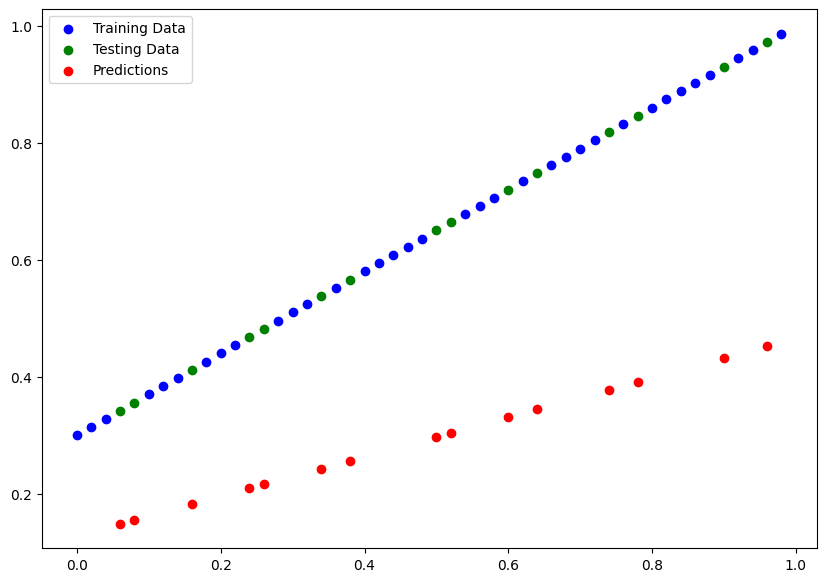

In [28]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to learn the patterns in the data and move from some unknown *parameters* (maybe random) to some known parameters i.e., from poor representation to good representation.

One way to measure, how poor or how wrong your model predictions are is to use `loss function`

**Loss Function** :  A function to measure how wrong your model's predictions are to the ideal output, lower is better.

**Optimizer** : Takes into account the loss of a model and adjusts the model's parameter (e.g weight and bias in our case) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Bulinding a training loop (and a testing loop) in PyTorch

Things yoou need  in a training loop:
 1. Loop through data
 2. Forward pass
 3. Calculate the loss
 4. Optimizer zero grad
 5. Loss backward
 6. Optimizer step